In [32]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import preprocessing as prepro 

#Insert your features and labels
samples = np.load('activation_maps_lines_image52_pixel.npy')
features = np.load('activation_maps_lines_image52_labelpixel.npy')

print("The shape of samples and featuresis:\n ",samples.shape,features.shape)
# Reshape your data  (pixels x features)
samples_num = samples.shape[0]   # Total number of pixels
features_num = samples.shape[1]  # Number of features for each pixel
X_reshaped = samples.reshape(samples_num,features_num)
y_reshaped = features.reshape(samples_num)  # Assuming y is your pixel-wise label mask
print(X_reshaped.shape,y_reshaped.shape)

The shape of samples and featuresis:
  (16384, 13) (16384, 1)
(16384, 13) (16384,)


In [33]:
dataframe = pd.DataFrame(samples,columns=np.arange(0,13))
dataframe['13']=features # Adding features coulmn into the samples dataset 
dataframe.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16384 entries, 0 to 16383
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       16384 non-null  float64
 1   1       16384 non-null  float64
 2   2       16384 non-null  float64
 3   3       16384 non-null  float64
 4   4       16384 non-null  float64
 5   5       16384 non-null  float64
 6   6       16384 non-null  float64
 7   7       16384 non-null  float64
 8   8       16384 non-null  float64
 9   9       16384 non-null  float64
 10  10      16384 non-null  float64
 11  11      16384 non-null  float64
 12  12      16384 non-null  float64
 13  13      16384 non-null  uint8  
dtypes: float64(13), uint8(1)
memory usage: 1.6 MB


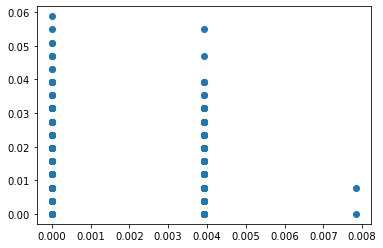

In [34]:
# Question A1
X_feature=dataframe[7]
Y_feature=dataframe[2]
plt.scatter(X_feature,Y_feature)

In [35]:
# Question A2
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
feature_1 =pd.DataFrame(dataframe[11])
feature_2  =pd.DataFrame(dataframe[5])
# Split the reshaped data into training and testing sets
data_train, data_test, output_train, output_test = train_test_split(feature_1, feature_2, test_size=0.3, random_state=42)
ln_regre=linear_model.LinearRegression()
ln_regre.fit(data_train,output_train)
ln_regre_predict=ln_regre.predict(data_test)

In [36]:
print("Mean Sqaured error: %.2f" % mean_squared_error(output_test,ln_regre_predict))

Mean Sqaured error: 0.00


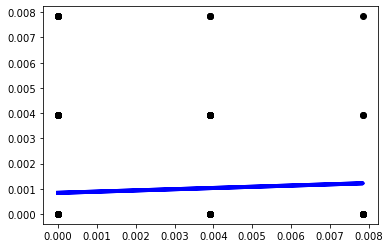

In [37]:
plt.scatter(data_test,output_test,color="black")
plt.plot(data_test,ln_regre_predict,color="blue",linewidth=4)

In [38]:
# Question A3
ind_feature_mean=feature_1.mean()
print("The mean value of class 1: \n",ind_feature_mean)
dep_feature_mean=feature_2.mean()
print("The mean value of class 2: \n",dep_feature_mean)
theta_1 = np.sum((feature_1 - ind_feature_mean) * (feature_2 - dep_feature_mean)) / np.sum((feature_1 - ind_feature_mean) ** 2)
print("The vaue of theta_1 : \n",theta_1)
theta_0 = dep_feature_mean - theta_1 * ind_feature_mean
print("The value of theta_0 : \n",theta_0)

The mean value of class 1: 
 11    0.000242
dtype: float64
The mean value of class 2: 
 5    0.000857
dtype: float64
The vaue of theta_1 : 
 5     NaN
11    0.0
dtype: float64
The value of theta_0 : 
 5    NaN
11   NaN
dtype: float64


In [41]:
# Question A4
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np
class_1 = dataframe.loc[:, dataframe.columns[:13]]
class_2 = dataframe.loc[:, dataframe.columns[13]]
input_train, input_test, output_train, output_test = train_test_split(class_1, class_2, test_size=0.2, random_state=42)
logreg = LogisticRegression()
# Train the model using the training set
logreg.fit(input_train, output_train)
# Make predictions on the test set
output_prediction = logreg.predict(input_test)

# Calculate accuracy
accuracy = accuracy_score(output_test, output_prediction)
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Mean Sqaured error: %.2f" % mean_squared_error(output_test,output_prediction))

Accuracy: 56.12%
Mean Sqaured error: 0.55


In [44]:
# Question A5
# Knn Regressor
from sklearn.neighbors import KNeighborsRegressor
K_X_train, K_X_test, K_y_train, K_y_test = train_test_split(feature_1, feature_2, test_size=0.2, random_state=42)
K_X_train=K_X_train.values.reshape(-1,1)
K_X_test=K_X_test.values.reshape(-1,1)
k = 3
knn_regressor = KNeighborsRegressor(n_neighbors=k)
knn_regressor.fit(K_X_train, K_y_train)
K_y_pred = knn_regressor.predict(K_X_test)
mse = mean_squared_error(K_y_test, K_y_pred)
print("Mean Squared Error:", mse)
new_data_point = dataframe[4]
new_data_point=new_data_point.values.reshape(-1,1)
predicted_values = knn_regressor.predict(new_data_point)
print("Predicted Value for {}: {}".format(new_data_point, predicted_values))


Mean Squared Error: 3.0775129810417873e-06
Predicted Value for [[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]: [[0.00130719]
 [0.00130719]
 [0.00130719]
 ...
 [0.00130719]
 [0.00130719]
 [0.00130719]]


In [49]:
# Decision tree regressor
from sklearn.tree import DecisionTreeRegressor
tree_X_train, tree_X_test, tree_y_train, tree_y_test = train_test_split(feature_1, feature_2, test_size=0.2, random_state=42)
tree_X_train=tree_X_train.values.reshape(-1,1)
tree_X_test=tree_X_test.values.reshape(-1,1)
decision_tree_regressor = DecisionTreeRegressor(random_state=42)
decision_tree_regressor.fit(tree_X_train, tree_y_train)
tree_y_predict = decision_tree_regressor.predict(tree_X_test)
mse = mean_squared_error(tree_y_test, tree_y_predict)
print("Mean Squared Error:", mse)
new_data_point = dataframe[4]
new_data_point=new_data_point.values.reshape(-1,1)
predicted_values = decision_tree_regressor.predict(new_data_point)
print("Predicted Value for {}: {}".format(new_data_point, predicted_values))

Mean Squared Error: 2.7693840102590777e-06
Predicted Value for [[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]: [0.00083809 0.00083809 0.00083809 ... 0.00083809 0.00083809 0.00083809]
